Testing a markov chain component model where the components can exist in three states
- 0: Failed
- 1: Minor Failure
- 2: Major Failure

In [1]:
import sys
sys.path.append('..')

Simulate n components and check MTTF

In [2]:
import numpy as np
from shipClass.Component import Component

# simulate n three state components and determine if their MTTF is still similar to input
n= 1000
MTTFs = np.zeros(n)

MTTF= 25
MTTR= 'NR'
states = {0: 'major failure', 
          1: 'minor failure/alert', 
          2: 'working'}

# create and initialize components
for i in range(n):

    # creating a component with three states
    test_comp = Component(f"3 State Test Comp {i}", MTTF, MTTR, states)
    test_comp.initialize(repairable = False)

    # simulate the markov chain behavior
    while test_comp.state == max(states.keys()): 
        test_comp.simulate(1)

    # record the failure time
    MTTFs[i]= test_comp.grabFailureTime()

# determine mean failure time of all simulated components
print(f"The desired MTTF for {n} components: {MTTF:.2f} hours")
MTTF = MTTFs.mean()
print(f"The simulated MTTF for {n} components: {MTTF:.2f} hours")

The desired MTTF for 1000 components: 25.00 hours
The simulated MTTF for 1000 components: 24.06 hours


Add n components to a system, no sensors

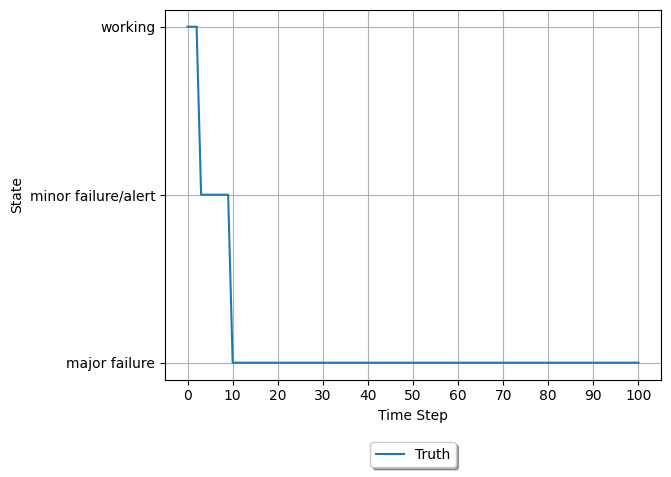

In [10]:
from shipClass.System_2 import System
from shipClass.Component import Component

n= 6
MTTFs = [10, 20, 30, 40, 50, 60]
comps = [Component(name=f"Comp {i+1}", MTTF=mttf) for i, mttf in enumerate(MTTFs)]
sys = System(name="Test System", comps=comps)

sys.simulate(100)
sys.plotHistory()